In [1]:
import numpy as np
import networkx as nx

In [2]:
def Cantor_Process_Tree_Hamiltonian(gamma: float=1., steps: int=3):
    
    size = 2**(steps+1)-1
    A = np.zeros((size, size))
    
    for i in range(size):
        for j in range(steps):
            d = 2**j
            if i%(2*d) == d-1:
                if (i+d)%(4*d) == 2*d-1:
                    A[i, i+d] = -1
                    A[i+d, i] = -1
                else:
                    A[i-d, i] = -1
                    A[i, i-d] = -1
    
    for i in range(size):
        A[i, i] = -A.sum(axis=1)[i]
        
    return -gamma*A

In [3]:
gamma = 1.
steps = 4
Hamiltonian = Cantor_Process_Tree_Hamiltonian(gamma=gamma, steps=steps)

In [4]:
print(np.linalg.eigvals(Hamiltonian))

[-5.28824561e+00 -5.14073207e+00 -3.39944744e+00 -3.87403205e+00
 -2.12596795e+00 -1.41950903e+00 -7.11754389e-01 -1.66069321e-15
 -4.03114612e-02 -4.70927536e+00 -4.70927536e+00 -2.19393657e+00
 -2.19393657e+00 -9.67880741e-02 -9.67880741e-02 -2.67949192e-01
 -3.73205081e+00 -3.73205081e+00 -3.73205081e+00 -3.73205081e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -2.67949192e-01 -2.67949192e-01 -2.67949192e-01 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00]


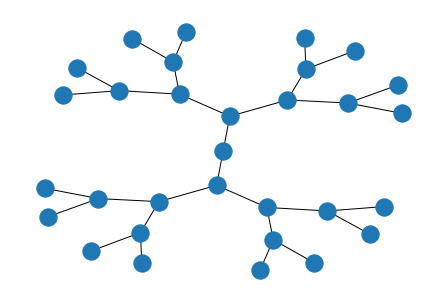

In [5]:
G = nx.from_numpy_array(abs(Hamiltonian))
G.remove_edges_from(nx.selfloop_edges(G))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos)

In [6]:
def Cantor_Set_Weak_Prob_Hamiltonian(gamma: float=1., steps: int=4) -> np.ndarray:
    
    size = 2**steps
    A = np.zeros((size, size))
    
    A[0, 1] = 1
    A[-1, -2] = 1
    
    for i in range(steps-1):
        k = steps-i
        s = 2**k
        ss = s>>1
        den = 3**(k-1)+1
        for j in range(2**i):
            node = ss + s*j
            A[node - 1, node - 2] = 1 - 1/den
            A[node - 1, node] = 1/den
            A[node, node - 1] = 1/den
            A[node, node + 1] = 1 - 1/den
    
    for i in range(size):
        A[i, i] = -A.sum(axis=1)[i]
    
    return -gamma*A

In [7]:
gamma = 1.
steps = 4
Hamiltonian = Cantor_Set_Weak_Prob_Hamiltonian(gamma=gamma, steps=steps)

In [8]:
print(np.linalg.eigvals(Hamiltonian))

[-5.11743425e-17  5.28325871e-03  3.44748297e-02  4.61239841e-02
  2.41122031e-01  2.51202841e-01  3.15331821e-01  3.06630759e-01
  1.68466818e+00  1.69336924e+00  1.74879716e+00  1.75887797e+00
  2.00000000e+00  1.99471674e+00  1.96552517e+00  1.95387602e+00]


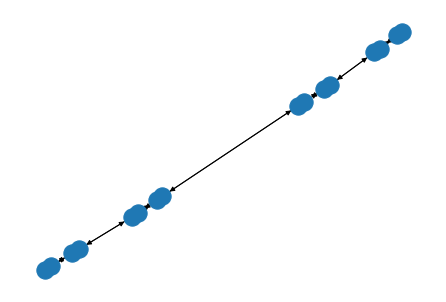

In [9]:
Weight = np.divide(1, abs(Hamiltonian), out=np.zeros_like(Hamiltonian), where=Hamiltonian!=0)
G = nx.from_numpy_array(Weight, create_using=nx.MultiDiGraph)
G.remove_edges_from(nx.selfloop_edges(G))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos)

In [10]:
def Cantor_Set_Weak_Asymmetric_Edges_Hamiltonian(gamma: float=1., steps: int=4) -> np.ndarray:
    
    size = 2**steps
    A = np.zeros((size, size))
    
    A[0, 1] = 1
    A[-1, -2] = 1
    
    for i in range(steps-1):
        k = steps-i
        s = 2**k
        ss = s>>1
        weight = 3**(k-1)
        for j in range(2**i):
            node = ss + s*j
            A[node - 1, node - 2] = weight
            A[node - 1, node] = 1
            A[node, node - 1] = 1
            A[node, node + 1] = weight
    
    for i in range(size):
        A[i, i] = -A.sum(axis=1)[i]
    
    return -gamma*A

In [11]:
gamma = 1.
steps = 4
Hamiltonian = Cantor_Set_Weak_Asymmetric_Edges_Hamiltonian(gamma=gamma, steps=steps)

In [12]:
print(np.linalg.eigvals(Hamiltonian))

[3.19064588e+01 3.01073781e+01 1.37839607e+01 1.37835915e+01
 1.22948568e+01 1.22943353e+01 4.92406435e+00 4.92407401e+00
 1.88597642e+00 1.78867065e+00 9.85951811e-01 9.72168353e-01
 5.85156067e-16 1.61528995e-02 1.29791752e-01 2.02568492e-01]


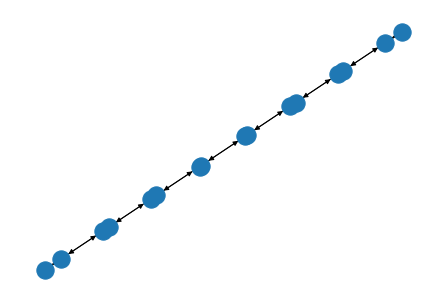

In [13]:
Weight = np.divide(1, abs(Hamiltonian), out=np.zeros_like(Hamiltonian), where=Hamiltonian!=0)
G = nx.from_numpy_array(Weight, create_using=nx.MultiDiGraph)
G.remove_edges_from(nx.selfloop_edges(G))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos)

In [14]:
def Cantor_Set_Weak_Symmetric_Edges_Hamiltonian(gamma: float=1., steps: int=4) -> np.ndarray:
    
    size = 2**steps
    A = np.zeros((size, size))
    
    A[0, 1] = 3**(steps-1)
    A[-1, -2] = 3**(steps-1)
    
    for i in range(steps-1):
        k = steps-i
        s = 2**k
        ss = s>>1
        weight = 3**i
        for j in range(2**i):
            node = ss + s*j
            A[node - 1, node - 2] = 3**(steps-1)
            A[node - 1, node] = weight
            A[node, node - 1] = weight
            A[node, node + 1] = 3**(steps-1)
    
    for i in range(size):
        A[i, i] = -A.sum(axis=1)[i]
    
    return -gamma*A

In [15]:
gamma = 1.
steps = 4
Hamiltonian = Cantor_Set_Weak_Symmetric_Edges_Hamiltonian(gamma=gamma, steps=steps)

In [16]:
print(f'Eigenvalues: \n{np.linalg.eig(Hamiltonian)[0]}\n')
# print(f'Eigenvectors: \n{np.linalg.eig(Hamiltonian)[1]}\n')

Eigenvalues: 
[ 6.58705832e+01  6.57186076e+01  6.46252227e+01  6.44604989e+01
  5.57737219e+01  5.54349147e+01  5.40000000e+01  5.42012270e+01
  1.00123046e+01  9.73669488e+00  7.85233886e+00  7.53950106e+00
 -3.31744829e-15  1.70908883e-01  1.49369283e+00  1.10978280e+00]



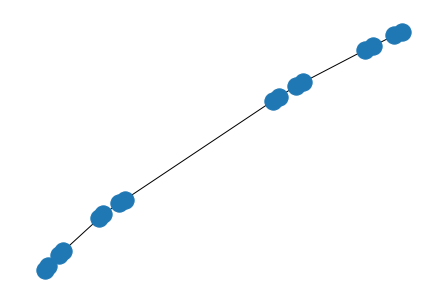

In [17]:
Weight = np.divide(1, abs(Hamiltonian), out=np.zeros_like(Hamiltonian), where=Hamiltonian!=0)
G = nx.from_numpy_array(Weight)
G.remove_edges_from(nx.selfloop_edges(G))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos)

In [18]:
def Cantor_Set_Weak_Symmetric_Prop_Hamiltonian(gamma: float=1., steps: int=4) -> np.ndarray:
    
    size = 2**steps
    A = np.zeros((size, size))
    
    A[0, 1] = 1
    A[-1, -2] = 1
    
    for i in range(steps-1):
        k = steps-i
        s = 2**k
        ss = s>>1
        den = 3**(k-1)
        for j in range(2**i):
            node = ss + s*j
            A[node - 1, node - 2] = 1
            A[node - 1, node] = 1/den
            A[node, node - 1] = 1/den
            A[node, node + 1] = 1
    
    for i in range(size):
        A[i, i] = -A.sum(axis=1)[i]
    
    return -gamma*A

In [19]:
gamma = 1.
steps = 6
Hamiltonian = Cantor_Set_Weak_Symmetric_Prop_Hamiltonian(gamma=gamma, steps=steps)

In [20]:
print(f'Eigenvalues: \n{np.linalg.eig(Hamiltonian)[0]}\n')
# print(f'Eigenvectors: \n{np.linalg.eig(Hamiltonian)[1]}\n')

Eigenvalues: 
[2.44041550e+00 2.44033291e+00 2.43973998e+00 2.43965123e+00
 2.43492989e+00 2.43475574e+00 2.43402250e+00 2.43412462e+00
 2.39515323e+00 2.39497494e+00 2.39372677e+00 2.39352677e+00
 2.38742589e+00 2.38755262e+00 2.38854107e+00 2.38827602e+00
 2.06742360e+00 2.06723690e+00 2.06589567e+00 2.06569340e+00
 2.05529028e+00 2.05488022e+00 2.05314499e+00 2.05338860e+00
 2.01006851e+00 2.00977426e+00 2.00778627e+00 2.00745285e+00
 2.00000000e+00 2.00017288e+00 2.00150937e+00 2.00111193e+00
 3.72210185e-01 3.72060691e-01 3.70987013e-01 3.70826098e-01
 3.62279524e-01 3.61960912e-01 3.60618329e-01 3.60805503e-01
 2.93897729e-01 2.93561343e-01 2.91205754e-01 2.90827365e-01
 2.81383256e-01 2.80874574e-01 2.79240780e-01 2.79484684e-01
 9.83642421e-17 1.61877319e-04 1.00324972e-03 1.40485380e-03
 6.32995862e-03 6.68846490e-03 9.04614349e-03 8.73010580e-03
 5.73788418e-02 5.71568040e-02 5.55642188e-02 5.53219567e-02
 4.36771484e-02 4.31859566e-02 4.13981204e-02 4.11030667e-02]



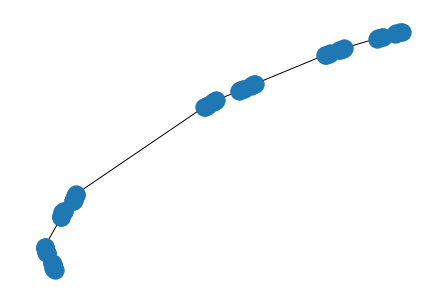

In [21]:
Weight = np.divide(1, abs(Hamiltonian), out=np.zeros_like(Hamiltonian), where=Hamiltonian!=0)
G = nx.from_numpy_array(Weight)
G.remove_edges_from(nx.selfloop_edges(G))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos)

In [22]:
def Cantor_Set_Full_Symmetric_Prop_Hamiltonian(gamma: float=1., steps: int=4) -> np.ndarray:
    
    size = 2**steps
    A = np.zeros((size, size))
    Weak_Hamiltonian = Cantor_Set_Weak_Symmetric_Prop_Hamiltonian(gamma=1., steps=steps)
    D = np.divide(1, abs(Weak_Hamiltonian), out=np.zeros_like(Weak_Hamiltonian), where=Weak_Hamiltonian!=0)
    D = D.astype(int)
    
    for i in range(size):
        for j in range(i, size):
            if i != j:
                d = 0
                d += j-i-1
                for k in range(i, j):
                    d += D[k, k+1]
                A[i, j] = 1/d
                A[j, i] = 1/d
    
    for i in range(size):
        A[i, i] = -A.sum(axis=1)[i]
    
    return -gamma*A

In [23]:
gamma = 1.
steps = 3
Hamiltonian = Cantor_Set_Full_Symmetric_Prop_Hamiltonian(gamma=gamma, steps=steps)

In [24]:
print(Hamiltonian)

[[ 1.53779051 -1.         -0.2        -0.14285714 -0.05882353 -0.05263158
  -0.04347826 -0.04      ]
 [-1.          1.74992084 -0.33333333 -0.2        -0.06666667 -0.05882353
  -0.04761905 -0.04347826]
 [-0.2        -0.33333333  1.81262061 -1.         -0.09090909 -0.07692308
  -0.05882353 -0.05263158]
 [-0.14285714 -0.2        -1.          1.67036754 -0.11111111 -0.09090909
  -0.06666667 -0.05882353]
 [-0.05882353 -0.06666667 -0.09090909 -0.11111111  1.67036754 -1.
  -0.2        -0.14285714]
 [-0.05263158 -0.05882353 -0.07692308 -0.09090909 -1.          1.81262061
  -0.33333333 -0.2       ]
 [-0.04347826 -0.04761905 -0.05882353 -0.06666667 -0.2        -0.33333333
   1.74992084 -1.        ]
 [-0.04       -0.04347826 -0.05263158 -0.05882353 -0.14285714 -0.2
  -1.          1.53779051]]


In [25]:
print(f'Eigenvalues: \n{np.linalg.eig(Hamiltonian)[0]}\n')
# print(f'Eigenvectors: \n{np.linalg.eig(Hamiltonian)[1]}\n')

Eigenvalues: 
[-5.55111512e-17  4.92866785e-01  1.09073439e+00  1.14432079e+00
  2.77269173e+00  2.76845196e+00  2.63647344e+00  2.63585991e+00]



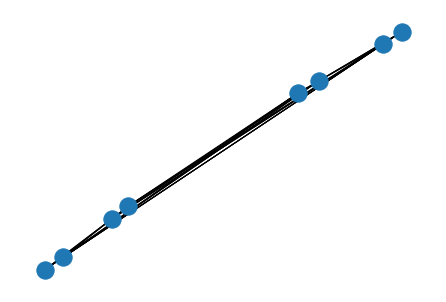

In [26]:
Weight = np.divide(1, abs(Hamiltonian), out=np.zeros_like(Hamiltonian), where=Hamiltonian!=0)
G = nx.from_numpy_array(Weight)
G.remove_edges_from(nx.selfloop_edges(G))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos)

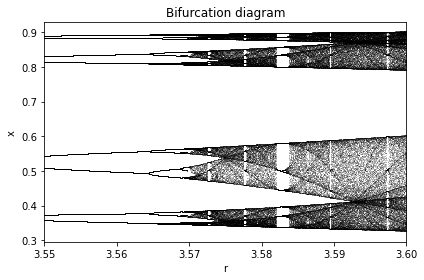

In [27]:
import numpy as np
import matplotlib.pyplot as plt


def logistic(r, x):
    return r * x * (1 - x)

init = 3.55
fin = 3.6

# 관측할 r과 각 r의 상태 x 생성
n = 10000
r = np.linspace(init, fin, n)
x = 0.1 * np.ones(n)

# step 수 및 diagram에 나타낼 state 개수(last) 설정
step = 1000
last = 27

fig = plt.figure()
for n in range(step):
    x = logistic(r, x)
    # 각 r에 대한 마지막 100개의 상태 x 플롯
    if n >= (step - last):
        plt.plot(r, x, marker=',', ls='', c='black', alpha=0.2)
plt.xlim(init, fin)
plt.title("Bifurcation diagram")
plt.xlabel('r')
plt.ylabel('x')
plt.tight_layout()

In [2]:
def Dual_Sierpinski_Gasket_Hamiltonian(gamma: float=1., steps: int=3) -> np.ndarray:
    
    size = 3**steps
    A = np.zeros((size, size))
    
    for i in [n+1 for n in range(steps)]:
        for j in range(int(size/(3**i))):
            a1 = np.floor((j*9 + 0*3 + 1) * 3**(i-2)).astype(int)
            a2 = np.floor((j*9 + 1*3 + 2) * 3**(i-2)).astype(int)
            b1 = np.floor((j*9 + 1*3 + 1) * 3**(i-2)).astype(int)
            b2 = np.floor((j*9 + 2*3 + 2) * 3**(i-2)).astype(int)
            c1 = np.floor((j*9 + 2*3 + 1) * 3**(i-2)).astype(int)
            c2 = np.floor((j*9 + 0*3 + 2) * 3**(i-2)).astype(int)
            A[a1, a2] = 1
            A[a2, a1] = 1
            A[b1, b2] = 1
            A[b2, b1] = 1
            A[c1, c2] = 1
            A[c2, c1] = 1
    
    for i in range(size):
        A[i, i] = -A.sum(axis=1)[i]
    
    return -gamma*A

In [3]:
gamma = 1.
steps = 2
Hamiltonian = Dual_Sierpinski_Gasket_Hamiltonian(gamma=gamma, steps=steps)

In [4]:
print(Hamiltonian)

[[ 2. -1. -1. -0. -0. -0. -0. -0. -0.]
 [-1.  3. -1. -0. -0. -1. -0. -0. -0.]
 [-1. -1.  3. -0. -0. -0. -0. -1. -0.]
 [-0. -0. -0.  2. -1. -1. -0. -0. -0.]
 [-0. -0. -0. -1.  3. -1. -0. -0. -1.]
 [-0. -1. -0. -1. -1.  3. -0. -0. -0.]
 [-0. -0. -0. -0. -0. -0.  2. -1. -1.]
 [-0. -0. -1. -0. -0. -0. -1.  3. -1.]
 [-0. -0. -0. -0. -1. -0. -1. -1.  3.]]


In [5]:
print(f'Eigenvalues: \n{np.linalg.eig(Hamiltonian)[0]}\n')
# print(f'Eigenvectors: \n{np.linalg.eig(Hamiltonian)[1]}\n')

Eigenvalues: 
[0.        +0.0000000e+00j 4.30277564+0.0000000e+00j
 3.        +0.0000000e+00j 0.69722436+2.6741808e-16j
 0.69722436-2.6741808e-16j 3.        +0.0000000e+00j
 5.        +0.0000000e+00j 4.30277564+0.0000000e+00j
 3.        +0.0000000e+00j]



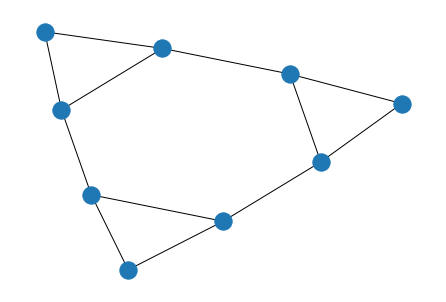

In [6]:
Weight = np.divide(1, abs(Hamiltonian), out=np.zeros_like(Hamiltonian), where=Hamiltonian!=0)
G = nx.from_numpy_array(Weight)
G.remove_edges_from(nx.selfloop_edges(G))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos)

In [7]:
def Sierpinski_Gasket_Hamiltonian(gamma: float=1., steps: int=2) -> np.ndarray:
    
    if steps==1:
        A = np.array([[-2, 1, 1, 0, 0, 0], 
                      [1, -4, 1, 1, 1, 0], 
                      [1, 1, -4, 0, 1, 1], 
                      [0, 1, 0, -2, 1, 0], 
                      [0, 1, 1, 1, -4, 1], 
                      [0, 0, 1, 0, 1, -2]])
        return -gamma*A
        
    else:
        B = Sierpinski_Gasket_Hamiltonian(gamma=1, steps=steps-1)
        sizeb = len(B)
        size = int(3*sizeb-3)
        A = np.zeros((size, size))
        B1 = np.pad(B, [(0, size-sizeb), (0, size-sizeb)], mode='constant')
        A += B1
        
        paste = sizeb-1
        target = int((3**steps+2*steps-1)/4)
        B2 = np.pad(B, [(paste, paste-1), (paste, paste-1)], mode='constant')
        B2[[paste, target], :] = B2[[target, paste], :]
        B2[:, [paste, target]] = B2[:, [target, paste]]
        A += B2
        
        paste = 2*sizeb-3
        target = sizeb-1
        paste2 = paste + int((3**steps+2*steps-1)/4)
        target2 = paste+1
        B3 = np.pad(B, [(paste, 0), (paste, 0)], mode='constant')
        B3[[paste, target], :] = B3[[target, paste], :]
        B3[:, [paste, target]] = B3[:, [target, paste]]
        for i in range(paste2, target2, -1):
            B3[[i, i-1], :] = B3[[i-1, i], :]
            B3[:, [i, i-1]] = B3[:, [i-1, i]]
        A += B3
        
        return gamma*A

In [11]:
gamma = 1.
steps = 3
Hamiltonian = Sierpinski_Gasket_Hamiltonian(gamma=gamma, steps=steps)

In [12]:
print(f'Eigenvalues: \n{np.linalg.eig(Hamiltonian)[0]}\n')
# print(f'Eigenvectors: \n{np.linalg.eig(Hamiltonian)[1]}\n')

Eigenvalues: 
[7.77156117e-16 6.08617619e-01 1.34538029e-01 1.34538029e-01
 2.22713444e+00 6.48528115e-01 6.48528115e-01 1.05652087e+00
 1.05652087e+00 1.38196601e+00 2.26175339e+00 4.00000000e+00
 2.26175339e+00 5.16424794e+00 4.18201809e+00 4.18201809e+00
 3.61803399e+00 3.73615026e+00 3.73615026e+00 5.18562891e+00
 5.18562891e+00 4.79486234e+00 4.79486234e+00 3.00000000e+00
 3.00000000e+00 3.00000000e+00 5.00000000e+00 5.00000000e+00
 5.00000000e+00 5.00000000e+00 6.00000000e+00 6.00000000e+00
 6.00000000e+00 6.00000000e+00 6.00000000e+00 6.00000000e+00
 6.00000000e+00 6.00000000e+00 6.00000000e+00 6.00000000e+00
 6.00000000e+00 6.00000000e+00]



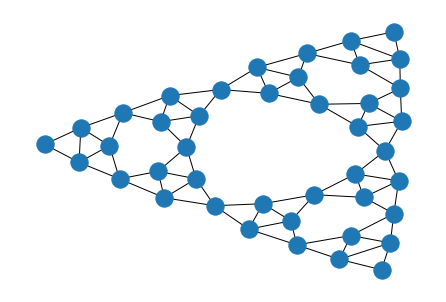

In [13]:
Weight = np.divide(1, abs(Hamiltonian), out=np.zeros_like(Hamiltonian), where=Hamiltonian!=0)
G = nx.from_numpy_array(Weight)
G.remove_edges_from(nx.selfloop_edges(G))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos)